# EXPLORATORY DATA ANALYSIS (EDA) ON TITANIC DATASET


In [151]:
# Import necessary libraries that we are going to use in this case, pandas,numpy ,seaborn and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


# 1.Data Overview

In [153]:
# Importing data sets
#loading the dataset
data = pd.read_csv("train.csv")

In [155]:
#view of first 10 rows of dataset
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [159]:
#checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [161]:
#number of records 
data.shape

(891, 12)

In [163]:
# Check for null & missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
# Handling missing values
#we fill Age with median
data["Age"]=data["Age"].fillna(data["Age"].median())
# Drop the 'Cabin' column only if it exists
if 'Cabin' in data.columns:
    data.drop('Cabin', axis=1, inplace=True)
else:
    print("The 'Cabin' column is not found in the dataset.")

The 'Cabin' column is not found in the dataset.


In [169]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [171]:
data.dropna(inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [173]:
# Check for duplicate records
duplicate_mask = data.duplicated()

# Count the number of duplicate records
num_duplicates = duplicate_mask.sum()
print(f"Number of duplicate records: {num_duplicates}")

# View duplicate records
if num_duplicates > 0:
    print("Duplicate records:")
    print(data[duplicate_mask])

# Optionally: Remove duplicate records
# train_df = train_df.drop_duplicates()

# Save the cleaned dataset (if duplicates were removed)
# train_df.to_csv('cleaned_train_dataset.csv', index=False)

Number of duplicate records: 0


# 2.Statistical Summary

In [178]:
# Statistical summary of numerical ,mean,mode,median,standard deviation
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,889.000000,889.000000,889.000000,889,889,889.000000,889.000000,889.000000,889,889.000000,889
unique,NaN,NaN,NaN,889,2,NaN,NaN,NaN,680,NaN,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,644
mean,446.000000,0.382452,2.311586,NaN,NaN,29.315152,0.524184,0.382452,NaN,32.096681,NaN
std,256.998173,0.486260,0.834700,NaN,NaN,12.984932,1.103705,0.806761,NaN,49.697504,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,224.000000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [180]:
#including mode
data.mode()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Abbing, Mr. Anthony",male,28.0,0.0,0.0,1601,8.05,S
1,2,NaN,NaN,"Abbott, Mr. Rossmore Edward",NaN,NaN,NaN,NaN,347082,NaN,NaN
2,3,NaN,NaN,"Abbott, Mrs. Stanton (Rosa Hunt)",NaN,NaN,NaN,NaN,CA. 2343,NaN,NaN
3,4,NaN,NaN,"Abelson, Mr. Samuel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,"Abelson, Mrs. Samuel (Hannah Wizosky)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
884,887,NaN,NaN,"de Mulder, Mr. Theodore",NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,888,NaN,NaN,"de Pelsmaeker, Mr. Alfons",NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,889,NaN,NaN,"del Carlo, Mr. Sebastiano",NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,890,NaN,NaN,"van Billiard, Mr. Austin Blyler",NaN,NaN,NaN,NaN,NaN,NaN,NaN


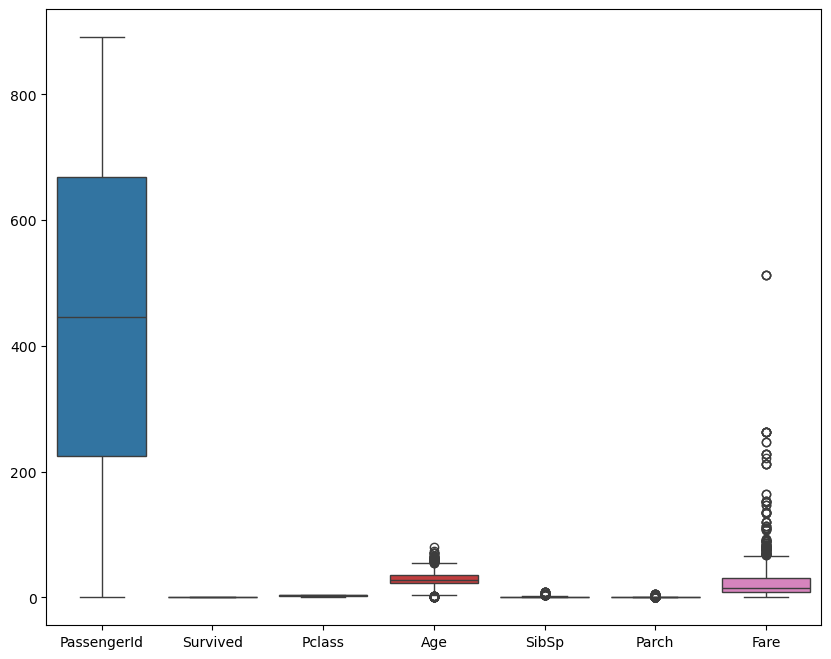

In [182]:
#check for outliers- using a box plot to identify columns with outliers
#figure size
plt.figure(figsize = (10,8))
#creating box plot
sns.boxplot(data = data)
#display the box plot chart
plt.show()

In [184]:
data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [186]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [249]:
#lets get the total number of survived noting that 0=not survived while 1=survived
data["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [251]:
#lets get the total number of  per class 
data["Pclass"].value_counts()

Pclass
3    491
1    214
2    184
Name: count, dtype: int64

In [253]:
#lets get the total number per gender
data["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [255]:
#lets get the total number of sibling/spouse
data["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [257]:
#count of parents/children
data["Parch"].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [259]:
#count of embarked
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# 3.Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

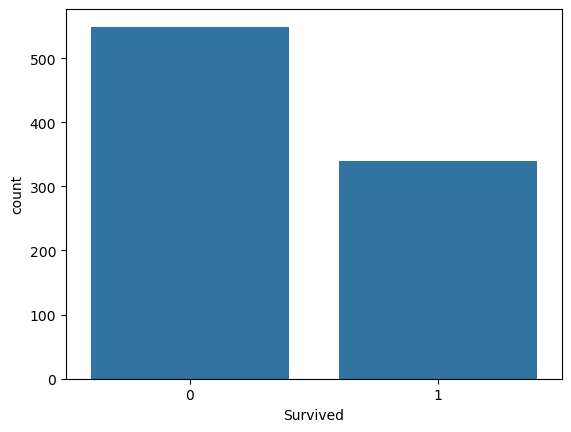

In [191]:
#Visualizing count of survivors
sns.countplot(x="Survived" ,data=data)

<Axes: xlabel='Pclass', ylabel='count'>

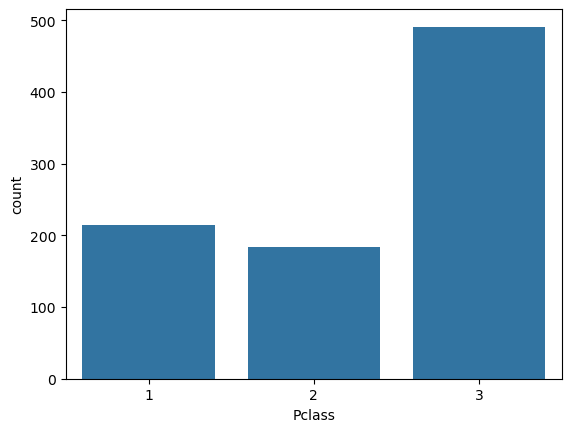

In [233]:
#Visualizing count of passenger class
sns.countplot(x="Pclass" ,data=data)

<Axes: xlabel='Sex', ylabel='count'>

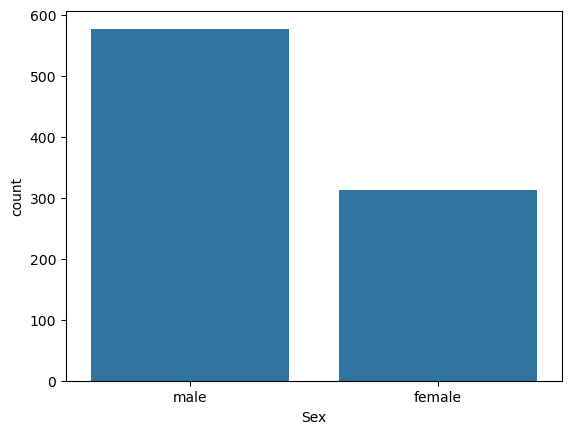

In [229]:
#Visualizing count of  Gender
sns.countplot(x="Sex" ,data=data)

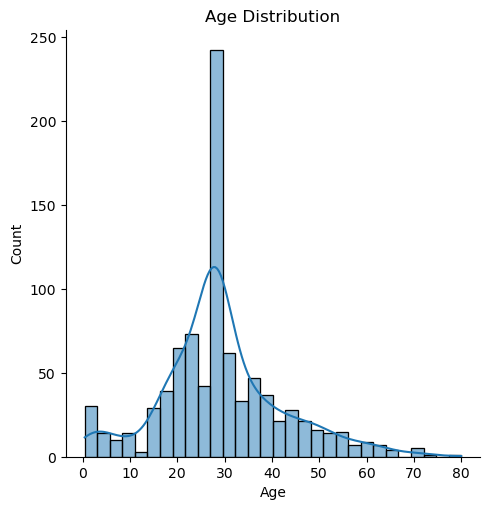

In [223]:
sns.displot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

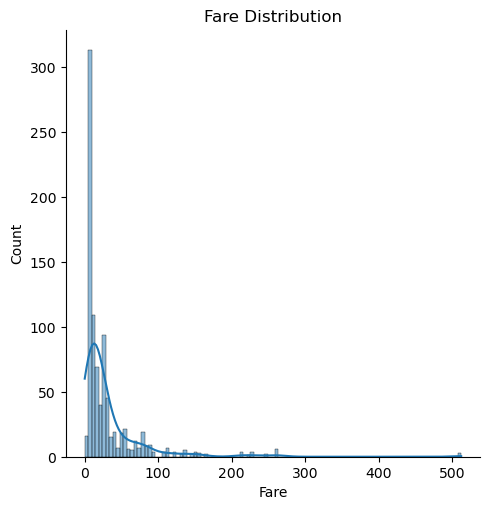

In [225]:
sns.displot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

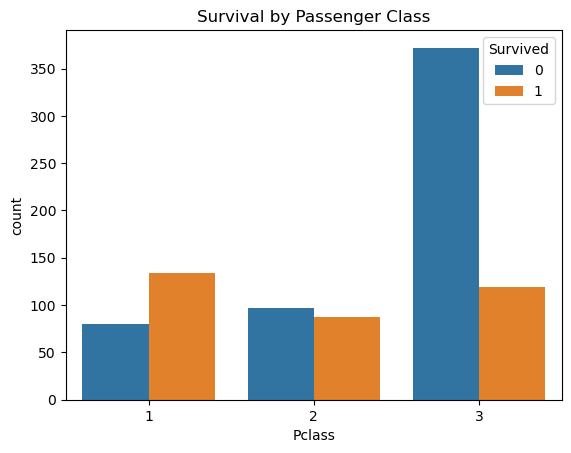

In [312]:
# Visualization of survival per class
sns.countplot(x="Pclass", hue="Survived", data=data)
plt.title("Survival by Passenger Class")
plt.show()

In [239]:
#there are higher chances of survival in travelling in pclass 1

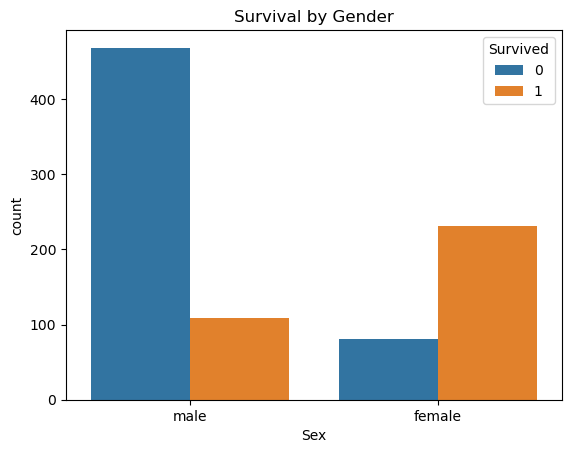

In [241]:
# Visualization of survival per gender
sns.countplot(x="Sex", hue="Survived", data=data)
plt.title("Survival by Gender")
plt.show()

In [243]:
#more female gender survived than male gender

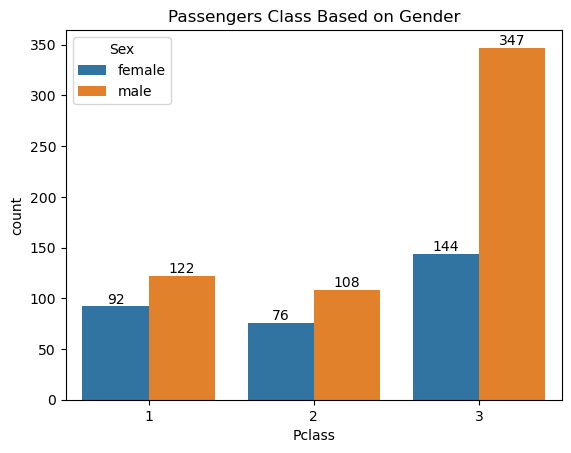

In [261]:
ax=sns.countplot(data, x="Pclass" , hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Passengers Class Based on Gender")
plt.show()

In [263]:
data.groupby("Sex")["SibSp"].value_counts()

Sex     SibSp
female  0        172
        1        106
        2         13
        3         11
        4          6
        8          3
        5          1
male    0        434
        1        103
        2         15
        4         12
        3          5
        5          4
        8          4
Name: count, dtype: int64

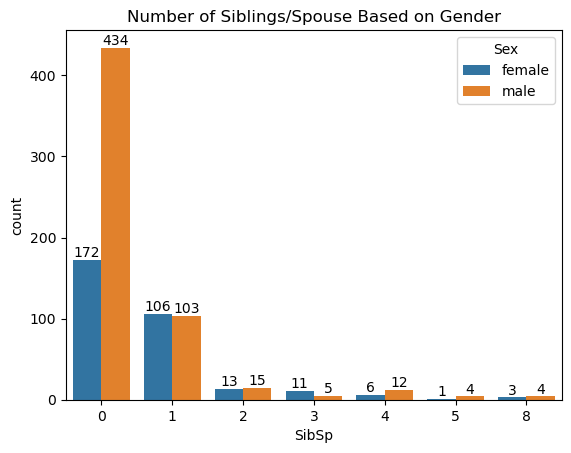

In [314]:
ax=sns.countplot(data, x="SibSp" , hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Siblings/Spouse Based on Gender")
plt.show()

In [316]:
data.groupby("Sex")["Parch"].value_counts()

Sex     Parch
female  0        192
        1         60
        2         49
        3          4
        5          4
        4          2
        6          1
male    0        484
        1         58
        2         31
        4          2
        3          1
        5          1
Name: count, dtype: int64

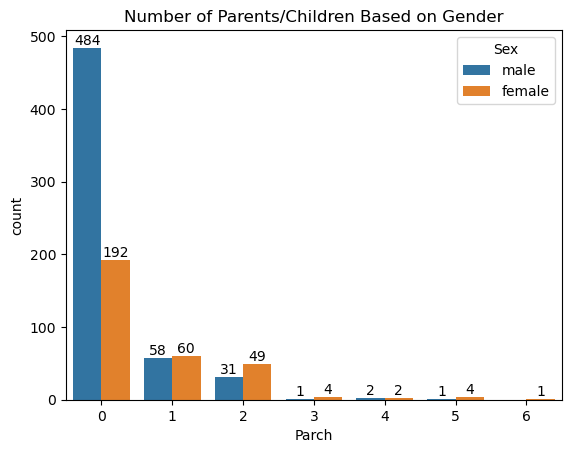

In [269]:
ax=sns.countplot(data, x="Parch" , hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Parents/Children Based on Gender")
plt.show()

In [271]:
data.groupby("Sex")["Embarked"].value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: count, dtype: int64

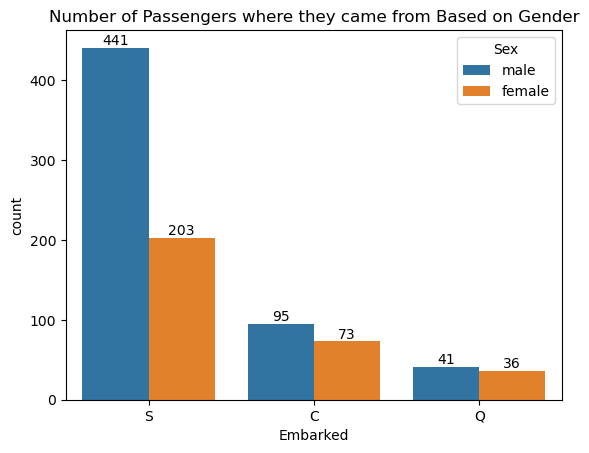

In [273]:
ax=sns.countplot(data, x="Embarked" , hue="Sex")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Number of Passengers where they came from Based on Gender")
plt.show()

In [305]:
#creating correlation matrix 
#selecting only the numeric columns
numeric_data = data.select_dtypes(include = [float,int])
#creating a correlation matrix
correlation_matrix = numeric_data.corr()
#display matrix
correlation_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


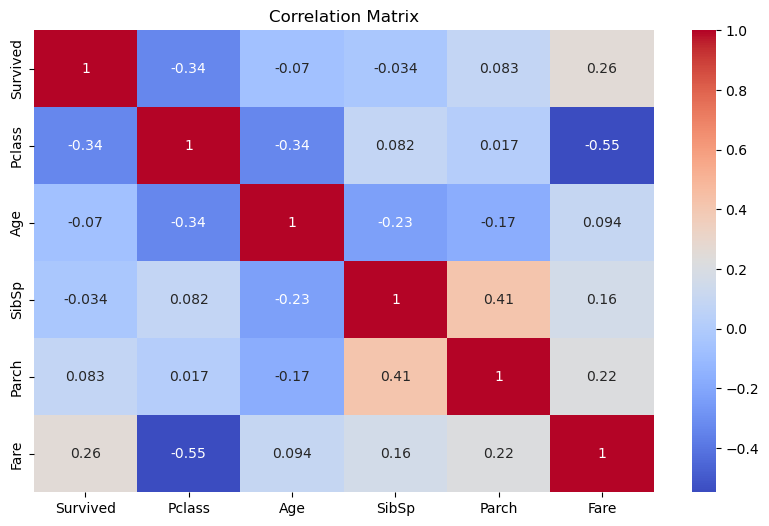

In [309]:
#heatmaps to identify relationships between different weather parameters.
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#maximum age of passengers
data["Age"].max()

In [277]:
#minimum age of passengers
data["Age"].min()

0.42

In [279]:
#average age of passengers
data["Age"].median()

28.0

In [285]:
#maximum fare paid by passengers
data["Fare"].max()

512.3292

In [287]:
#minimum fare paid by passengers
data["Fare"].min()

0.0

In [291]:
#average fare paid by passengers
data["Fare"].median()

14.4542

# Insights and Conclusions

In [4]:
#There are 891 rows and 12 columns of data.
#Data types are 2 float,5 int and 5 object.
#Null and missing values are in the following columns age(177),cabin(687) and embarked(2).
#Handling missing values - age i filled it with median,while for cabin i droped the whole column and embarked column i dropped the 2 null values.
#The following columns had outliers,,fare leading with more then age then parch and lastly Sibsp
#The following columns werent gonna be used and so i dropped them.They are PassengerId,Name and Ticket columns.
#Total number of survived people is 340 while those that died was 549.
#Total number per class was class 3 leading with 491,then class 1 which is 214 and lastly class 2 which is 184.
#Total number as per gender is male leading with 577 and female 312

In [6]:
#Visualizations data:
#1.Survival by passenger class showed that  there were high chances of survival in Pclass 1 while more chances of dying were in Pclass 3.
#2.Survival per gender shows that female gender survived more than the male gender.
#3.passengers class based on gender shows that in every Pclass there were more males than females.

In [8]:
#Correlation matrix explanation:
#1.Positive correlated columns include;
#Survived and fare
#SibSp and Parch
#SibSp and Fare

#2.Zero correlated columns include;
#Survived and Parch
#Pclass and SibSp
#Age and Fare
#Parch and Pclass

#3.Negative correlated columns include;
#Survived and Pclass
#Survived and Age
#Survived and SibSp
#Pclass and Age
#Pclass and Fare
#Age and SibSp
#Age and Parch

In [10]:
#Maximum age of passengers is 80
#Average age of passengers is 28.0
#Minimum age of passengers is 0.42
#Maximum fare paid by passengers is 512.33
#Average fare paid by passengers is 14.45
#Minimum fare paid by passengers is 0.0